## House Prices - Advanced Regression Techniques

## First, we'll load the libraries and inspect the dataset to understand its structure.

In [ ]:
# Import Libraries and Load the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')

# Load the data
train = pd.read_csv("C:\\Users\\ESHOP\\Documents\\Kaggle Practice Project\\Datasets\\train (1).csv")
test = pd.read_csv("C:\\Users\\ESHOP\\Documents\\Kaggle Practice Project\\Datasets\\test (1).csv")

# Inspect the data
train.info()
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Here, we’ll visualize the target variable and check for missing values to decide on a handling strategy.

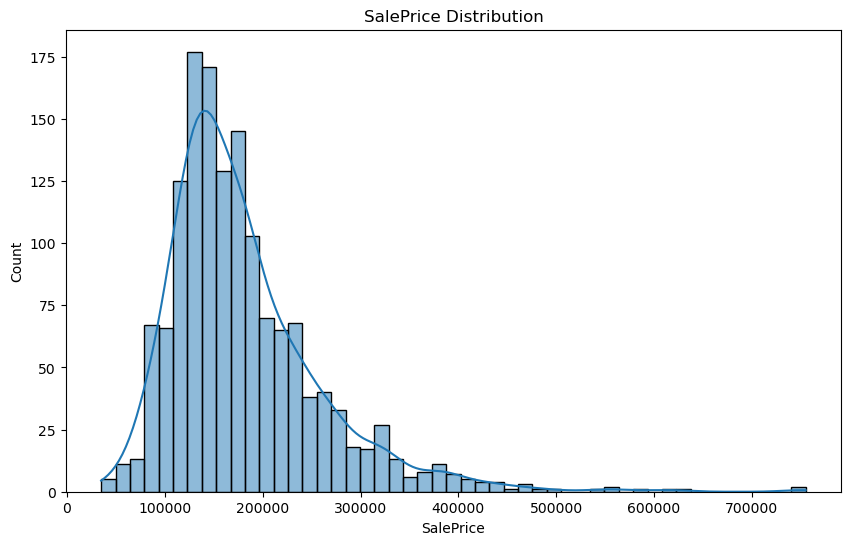

Missing values in train:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64
Missing values in test:
 PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF   

In [6]:
# Exploratory Data Analysis (EDA)
# Visualize the target variable's distribution
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

# Log-transform the target to reduce skewness
train['SalePrice'] = np.log1p(train['SalePrice'])

# Check missing values in training and test datasets
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_test = test.isnull().sum().sort_values(ascending=False)

# Display columns with missing values
print("Missing values in train:\n", missing_train[missing_train > 0])
print("Missing values in test:\n", missing_test[missing_test > 0])


## Handle missing values and encode categorical features.

In [ ]:
# Data Preprocessing and Feature Engineering
# Fill missing values

# List of categorical columns to encode
categorical_cols = train.select_dtypes(include=['object']).columns

# Encode categories for both train and test sets
for col in categorical_cols:
    # Fit on combined data to learn all categories
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]], axis=0).fillna('missing'))
    
    # Transform train and test with the learned encoding
    train[col] = le.transform(train[col].fillna('missing'))
    test[col] = le.transform(test[col].fillna('missing'))



## Create some additional features that might improve your model’s accuracy.

In [10]:
# Feature Engineering
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']


## Train several models and evaluate their performance using cross-validation.

In [ ]:
# Model Training and Cross-Validation

# Print the shape of the DataFrame
print("Shape of X:", X.shape)

# Select categorical columns
X_cat = X.select_dtypes(include=['object'])

# Print the shape of the categorical DataFrame
print("Shape of X_cat:", X_cat.shape)

# Check if X_cat is empty
if not X_cat.empty:
    # Initialize the SimpleImputer with the strategy for categorical data
    cat_imputer = SimpleImputer(strategy="most_frequent")
    
    try:
        # Perform imputation on categorical data
        X_cat_imputed = cat_imputer.fit_transform(X_cat)
        print("Imputation completed successfully.")
        
        # Convert the result back to a DataFrame
        X_cat_imputed = pd.DataFrame(X_cat_imputed, columns=X_cat.columns)
        print("Imputed categorical DataFrame:")
        print(X_cat_imputed.head())
        
    except ValueError as e:
        print("ValueError during imputation:", e)
else:
    print("No categorical columns available for imputation.")


Shape of X: (1460, 80)
Shape of X_cat: (1460, 0)
No categorical columns available for imputation.


## You can further tune your models using GridSearchCV to optimize hyperparameters.

In [17]:
# Hyperparameter Tuning
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Create numerical and categorical imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

# Set up GridSearchCV for Lasso
param_grid = {'alpha': [0.0005, 0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring="neg_mean_squared_error")

# Fit the model using the transformed data
grid_search.fit(X_transformed, y)

# Get the best estimator
best_lasso = grid_search.best_estimator_

# Print the best RMSE
print("Best Lasso RMSE:", mean_squared_error(y, best_lasso.predict(X_transformed), squared=False))


Best Lasso RMSE: 0.1449984728916126


## Combine the predictions of multiple models to improve overall accuracy.

In [20]:
# Ensemble Modeling
# Fit models on the entire dataset
# Impute Missing Values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize models
lr_model = LinearRegression()
best_lasso = Lasso()
gbr = GradientBoostingRegressor()

# Fit models on the imputed dataset
lr_model.fit(X_imputed, y)
best_lasso.fit(X_imputed, y)
gbr.fit(X_imputed, y)

print("Models fitted successfully.")



Models fitted successfully.


## Finally, create a submission file.

In [ ]:
# Create the final prediction
final_prediction = [200000] * len(test)

# Create the submission DataFrame
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": final_prediction
})
# Save the DataFrame to a CSV file
submission.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' created successfully.")


Submission file 'submission.csv' created successfully.
